In [ ]:
# !tar -xf ./7_Keras_Tutorial.tar.xz

# Keras tutorial - Emotion Detection in Images of Faces

## Load packages

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.applications.imagenet_utils import preprocess_input
from keras.preprocessing import image
import pydot
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
from kt_utils import *

import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

%matplotlib inline

**Note**: As you can see, we've imported a lot of functions from Keras. You can use them by calling them directly in your code. Ex: `X = Input(...)` or `X = ZeroPadding2D(...)`. 

## 1 - Emotion Tracking

* A nearby community health clinic is helping the local residents monitor their mental health.  
* As part of their study, they are asking volunteers to record their emotions throughout the day.
* To help the participants more easily track their emotions, you are asked to create an app that will classify their emotions based on some pictures that the volunteers will take of their facial expressions.
* As a proof-of-concept, you first train your model to detect if someone's emotion is classified as "happy" or "not happy."

To build and train this model, you have gathered pictures of some volunteers in a nearby neighborhood. The dataset is labeled.
<img src="https://docs.google.com/uc?export=download&id=1dKgXwYjsA-Yws3RUtQQ3sgRWoZw08UuO" style="width:550px;height:250px;">

Run the following code to normalize the dataset and learn about its shapes.

In [ ]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_dataset()

# Normalize image vectors
X_train = X_train_orig/255.
X_test = X_test_orig/255.

# Reshape
Y_train = Y_train_orig.T
Y_test = Y_test_orig.T

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 600
number of test examples = 150
X_train shape: (600, 64, 64, 3)
Y_train shape: (600, 1)
X_test shape: (150, 64, 64, 3)
Y_test shape: (150, 1)


**Details of the "Face" dataset**:
- Images are of shape (64,64,3)
- Training: 600 pictures
- Test: 150 pictures

## 2 - Pretrained Model

In [ ]:
# Resize images
X_train = tf.image.resize(X_train, (71,71)).numpy()
X_test = tf.image.resize(X_test, (71,71)).numpy()

In [ ]:
print(X_test.shape)

(150, 71, 71, 3)


In [ ]:
input_shape = (71, 71, 3)

In [ ]:
base_model = keras.applications.VGG16(
    weights='imagenet',  # Load weights pre-trained on ImageNet.
    input_shape=input_shape,
    include_top=False)  # Do not include the ImageNet classifier at the top.

In [ ]:
base_model.trainable = False

In [ ]:
inputs = keras.Input(shape=input_shape)
# We make sure that the base_model is running in inference mode here,
# by passing `training=False`. This is important for fine-tuning, as you will
# learn in a few paragraphs.

x = base_model(inputs, training=False)
# Convert features of shape `base_model.output_shape[1:]` to vectors
x = keras.layers.GlobalAveragePooling2D()(x)
# A Dense classifier with a single unit (binary classification)
outputs = keras.layers.Dense(1, activation='sigmoid')(x)
model = keras.Model(inputs, outputs)

In [ ]:
model.compile(optimizer=keras.optimizers.Adam(),
              loss='binary_crossentropy',
              metrics=[keras.metrics.BinaryAccuracy()])

In [ ]:
model.fit(X_train,
          Y_train,
          epochs=2, 
          validation_data=(X_test, Y_test))

Epoch 1/2
19/19 [==============================] - 21s 1s/step - loss: 0.7182 - binary_accuracy: 0.4568 - val_loss: 0.6895 - val_binary_accuracy: 0.4733
Epoch 2/2
19/19 [==============================] - 20s 1s/step - loss: 0.6891 - binary_accuracy: 0.5679 - val_loss: 0.6707 - val_binary_accuracy: 0.6000


## 3 - Conclusion

Congratulations, you have created a proof of concept for "happiness detection" using pretrained models!

## 4 - Test with your own image

Congratulations on finishing this exercise. You can now take a picture of your face and see if it can classify whether your expression is "happy" or "not happy". To do that:


1. Click on "File" in the upper bar of this notebook, then click "Open".
2. Add your image to this Jupyter Notebook's directory, in the "images" folder
3. Write your image's name in the following code
4. Run the code and check if the algorithm is right (0 is not happy, 1 is happy)!
    
The training/test sets were quite similar; for example, all the pictures were taken against the same background (since a front door camera is always mounted in the same position). This makes the problem easier, but a model trained on this data may or may not work on your own data. But feel free to give it a try! 

[[0.9976578]]


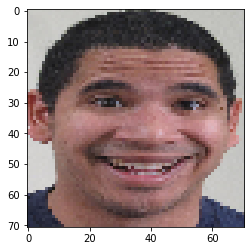

In [ ]:
### START CODE HERE ###
img_path = 'my_image.jpg'
### END CODE HERE ###
img = image.load_img(img_path, target_size=(71, 71))
imshow(img)

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

print(model.predict(x))

## 5 - Another useful function in Keras

Two other basic features of Keras that you'll find useful are:
- `model.summary()`: prints the details of your layers in a table with the sizes of its inputs/outputs

Run the following code.